# Data  Preparation

## Objectives

- Clean the data to remove non images
- Split the data into train 70%, test 20%, and validation 10% sets
- Resize images to get a uniform dataset

## Inputs


- Cherry Leaves dataset collected and stored in inputs/cherry_leaves_dataset

## Outputs


- Plot showing the data balance and image size variation

## Changing work directory

In [1]:
import os
os.chdir(os.path.dirname(os.getcwd()))
current_dir = os.getcwd()
current_dir

'/workspaces/Project_5_Cherry_Mildew'

In [2]:
data_dir = '/workspaces/Project_5_Cherry_Mildew/inputs/cherry_leaves_dataset/cherry-leaves'

In [3]:
output_dir = 'folder_output'

In [4]:
if 'output' not in os.listdir(current_dir):
    os.makedirs(name='output')
        
def create_output_dir(output_dir):
    try:
        os.makedirs(name=f'output/{output_dir}')
        print(f'Current output folder is {output_dir}')
        return f'output/{output_dir}'
    except:
        print(f'Current output folder is {output_dir}. Make a new one')
        return f'output/{output_dir}'
version_output = create_output_dir(output_dir)

Current output folder is folder_output. Make a new one


## Data Preparation

### Data cleaning

In [5]:
### Filtering out the non image files ###

healthy_leaves='inputs/cherry_leaves_dataset/cherry-leaves/healthy'
powdery_mildew='inputs/cherry_leaves_dataset/cherry-leaves/powdery_mildew'
file_extension = ('.png', '.jpg', '.jpeg')

def non_imgs(folder):
    files = os.listdir(folder)
    non_img_counter = 0
    for file in files:
        if not file.lower().endswith(file_extension):
            file_path = folder + '/' + file
            os.remove(file_path)
            non_img_counter =+ 1
        else:
            pass
    print(f"{folder} had {non_img_counter} non image files before removal")
                                                    
non_imgs(healthy_leaves)
non_imgs(powdery_mildew)

inputs/cherry_leaves_dataset/cherry-leaves/healthy had 0 non image files before removal
inputs/cherry_leaves_dataset/cherry-leaves/powdery_mildew had 0 non image files before removal


## Splitting data

Splittting data into train, test and valdation sets

In [6]:
train_set_ratio = 0.7
validation_set_ratio = 0.1
test_set_ratio = 0.2

ratio_sum = round(train_set_ratio + validation_set_ratio + test_set_ratio, 2)
if not ratio_sum == 1:
    print(f'WARNING: The sum of the ratios must be 1. Please make the necessary adjustments.')
else:
    print('Data ratio is set.')

data_labels = os.listdir(data_dir)
folder_names = ['train', 'validation', 'test']

for foldername in folder_names:
    for data_label in data_labels:
        os.makedirs(name=data_dir + '/' + foldername + '/' + data_label)

Data ratio is set.


In [7]:
### move the data to the new folders and delete the previous folders ###
import shutil
import random

for data_label in data_labels:
    data = os.listdir(data_dir + '/' + data_label)
    random.shuffle(data)
            
    train_data_lenght = round(len(data) * train_set_ratio)
    validation_data_lenght = round(len(data) * validation_set_ratio)
                        
    for img in data:
        if len(os.listdir(data_dir + '/train/' + data_label)) <= train_data_lenght:
            shutil.move(data_dir + '/' + data_label + '/' + img,
                        data_dir + '/train/' + data_label + '/' + img)
        elif len(os.listdir(data_dir + '/validation/' + data_label)) <= validation_data_lenght:
            shutil.move(data_dir + '/' + data_label + '/' + img,
                        data_dir + '/validation/' + data_label + '/' + img)           
        else:
            shutil.move(data_dir + '/' + data_label + '/' + img,
                        data_dir + '/test/' + data_label + '/' + img)
                                                                    
    os.rmdir(data_dir + '/' + data_label)

## Checking data for data inbalance

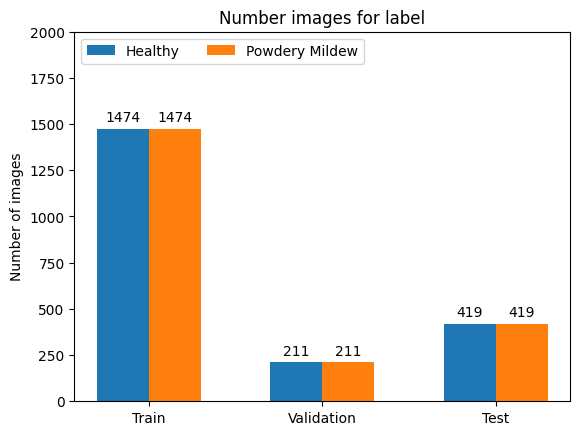

In [8]:
import matplotlib.pyplot as plt
import numpy as np

train_healthy = len(os.listdir(data_dir + '/train/healthy'))
train_mildew = len(os.listdir(data_dir + '/train/powdery_mildew'))
validation_healthy = len(os.listdir(data_dir + '/validation/healthy'))
validation_mildew = len(os.listdir(data_dir + '/validation/powdery_mildew'))
test_healthy = len(os.listdir(data_dir + '/test/healthy'))
test_mildew = len(os.listdir(data_dir + '/test/powdery_mildew'))

dataset = ('Train', 'Validation', 'Test')
penguin_means = {
    'Healthy': (train_healthy, validation_healthy, test_healthy),
    'Powdery Mildew': (train_mildew, validation_mildew, test_mildew),
}

x = np.arange(len(dataset))  # the label locations
width = 0.3  # width of the bars
multiplier = 0

fig, ax = plt.subplots(layout=None)

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of images')
ax.set_title('Number images for label')
ax.set_xticks(x + (width/2), dataset)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 2000)
plt.savefig(fname=version_output+'/dataset_balance')
plt.show()


## Checking image size

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import joblib

from matplotlib.image import imread

In [10]:
img_width, img_height = [], []
subset_dirs = ['/train/', '/validation/', '/test/']
for folder in subset_dirs:
    for label in data_labels:
        for img_file in os.listdir(data_dir + folder + label):
            img = imread(data_dir + folder + label + '/' + img_file, 0)
            img_shape = img.shape
            img_width.append(img_shape[1])
            img_height.append(img_shape[0])
                                    
                                    


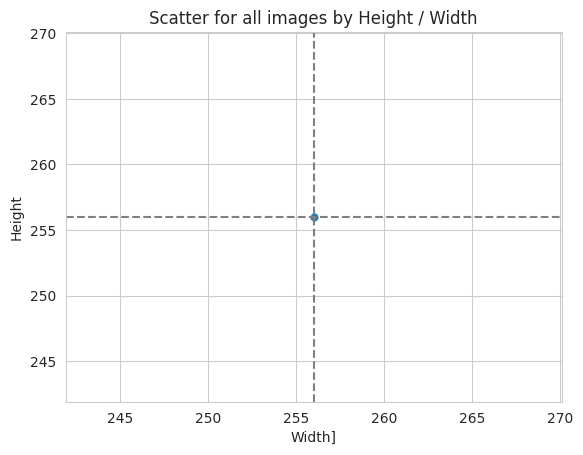

Width average: 256 
Height average: 256


In [11]:
fig, axes = plt.subplots()
sns.scatterplot(x=img_width, y=img_height, alpha=0.2)
axes.set_title('Scatter for all images by Height / Width')
axes.set_xlabel("Width]")
axes.set_ylabel("Height")
img_width_mean = int(np.array(img_width).mean())
img_height_mean = int(np.array(img_height).mean())
axes.axvline(x=img_width_mean,color='gray', linestyle='--')
axes.axhline(y=img_height_mean,color='gray', linestyle='--')
plt.savefig(fname=version_output+'/scatterplot_img_sizes')


plt.show()
print(f"Width average: {img_width_mean} \nHeight average: {img_height_mean}")

## Pushing changes and folowing steps

In [ ]:
 - Since the images are the same size and 